In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset

online_education = pd.read_csv("C:/Users/Arjun/Desktop/ONLINE EDUCATION SYSTEM REVIEW.csv")
online_education.head()



,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


In [3]:
#basic information about the dataset

online_education.shape
online_education.columns
online_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

In [4]:
#datatypes

online_education.dtypes

Gender                                                           object
Home Location                                                    object
Level of Education                                               object
Age(Years)                                                        int64
Number of Subjects                                                int64
Device type used to attend classes                               object
Economic status                                                  object
Family size                                                       int64
Internet facility in your locality                                int64
Are you involved in any sports?                                  object
Do elderly people monitor you?                                   object
Study time (Hours)                                                int64
Sleep time (Hours)                                                int64
Time spent on social media (Hours)                              

In [5]:
online_education['sno'] = range(1, len(online_education) + 1)


## Descriptive statistics

In [6]:
#Summary Statistic of Ordinal Data

online_education[["Age(Years)", "Family size", "Internet facility in your locality", "Study time (Hours)","Sleep time (Hours)","Time spent on social media (Hours)","Your interaction in online mode", "Clearing doubts with faculties in online mode", "Performance in online"]].describe()

,Age(Years),Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,19.798645,4.413359,3.586641,4.325266,6.947725,2.636980,2.930300,2.833495,6.696031
std,3.199158,1.236750,1.026063,2.134233,1.324039,1.859625,1.105387,1.163629,1.920048
min,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,18.000000,4.000000,3.000000,3.000000,6.000000,1.000000,2.000000,2.000000,6.000000
50%,19.000000,4.000000,4.000000,4.000000,7.000000,2.000000,3.000000,3.000000,7.000000
75%,20.000000,5.000000,4.000000,6.000000,8.000000,3.000000,4.000000,4.000000,8.000000
max,40.000000,10.000000,5.000000,10.000000,10.000000,10.000000,5.000000,5.000000,10.000000


In [7]:
#Coefficient of variance for age greater than 30

cv = lambda x: np.std(x, ddof=1) / np.mean(x)
data = online_education[online_education['Age(Years)'] > 30]['Age(Years)'].array
cv_greater_than_30 = cv(data)
cv_greater_than_30

#CV for average age
data = online_education['Age(Years)'].array
cv_mean = cv(data)
print("Mean coefficient of variance:", cv_mean)
print("Mean coefficient of variance for Age greater than 30:", cv_greater_than_30)


Mean coefficient of variance: 0.16158468594493283
Mean coefficient of variance for Age greater than 30: 0.06838046810895325


In [8]:
# T-test
from scipy import stats
female_average_score = online_education[online_education['Gender'] == "Female"]['Performance in online'].array
male_average_score = online_education[online_education['Gender'] == "Male"]['Performance in online'].array

stats.ttest_ind(female_average_score,male_average_score, equal_var=True)

Ttest_indResult(statistic=3.596875924481179, pvalue=0.00033733704253210533)

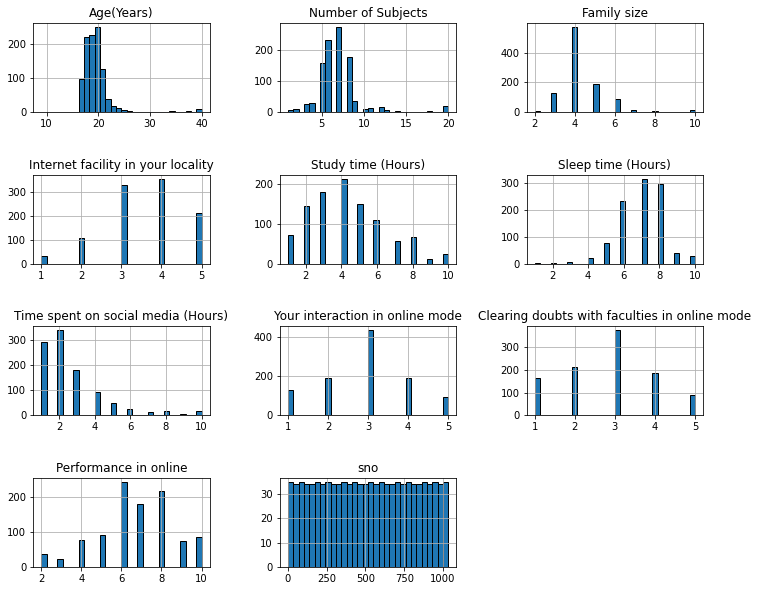

In [9]:
import matplotlib.pyplot as plt

online_education.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## Data analysis

<AxesSubplot:>

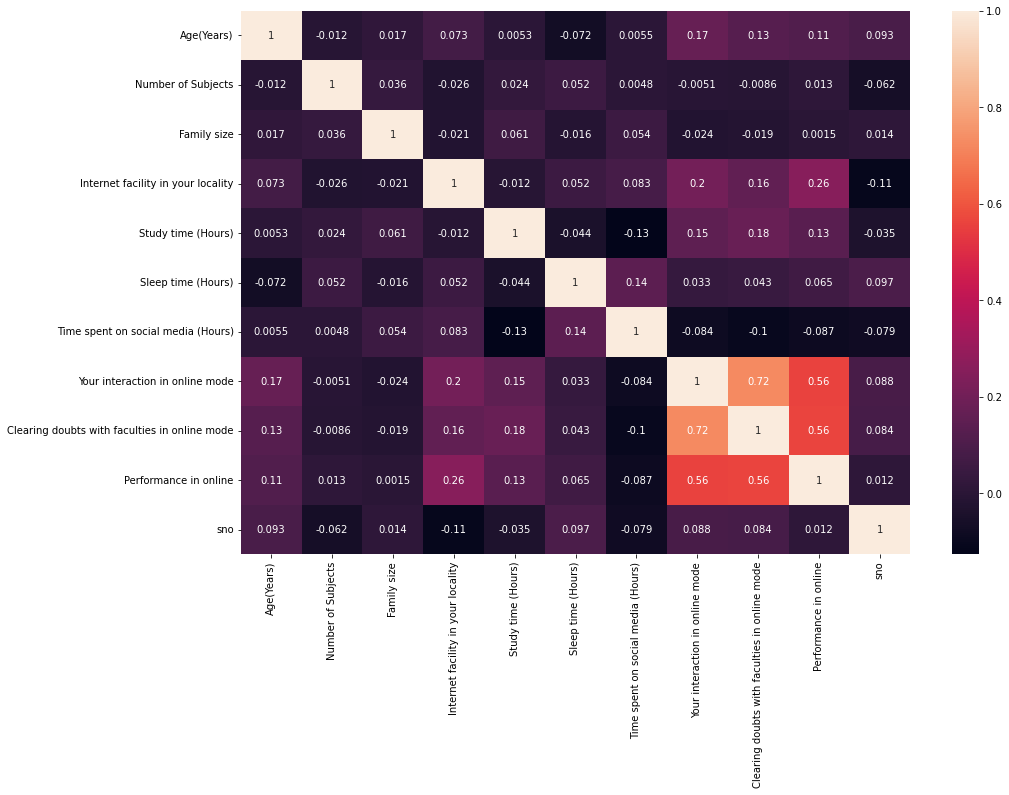

In [10]:
#Heat Map

plt.figure(figsize=(15,10))
sns.heatmap(online_education.corr(), annot=True)

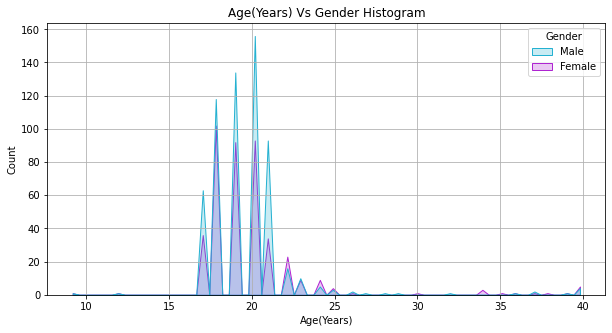

In [11]:
#Ploting Age(Years) vs Gender 

plt.figure(figsize=(10,5))
sns.histplot(x='Age(Years)' ,hue='Gender' , data=online_education ,element="poly", palette=('#24b1d1', '#ae24d1') );
plt.title("Age(Years) Vs Gender Histogram")
plt.grid()

###### As per the graph, we can see that we have more students who prefer online education with age around 17 to 23.

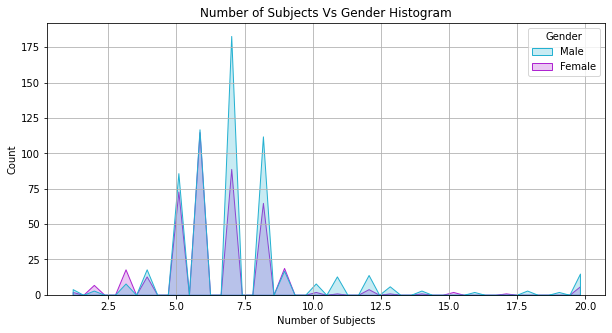

In [12]:
#Ploting Number of Subjects vs Gender 

plt.figure(figsize=(10,5))
sns.histplot(x='Number of Subjects' ,hue='Gender' , data=online_education ,element="poly", palette=('#24b1d1', '#ae24d1') );
plt.title("Number of Subjects Vs Gender Histogram")
plt.grid()

###### From the graph, we can say that most of the students are enrolling from 5 to 8 subjects.

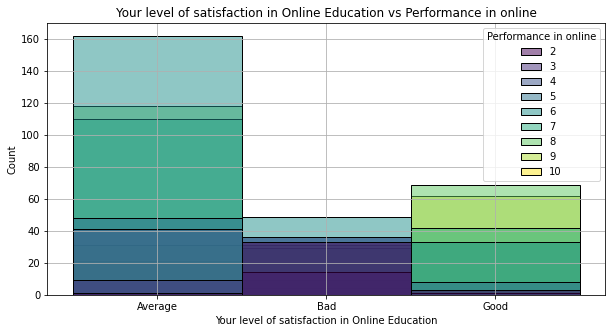

In [13]:
#Relation between Your level of satisfaction in Online Education and Performance in online

plt.figure(figsize=(10,5))
sns.histplot(x='Your level of satisfaction in Online Education' ,hue='Performance in online' , data=online_education , palette="viridis",edgecolor='black')
plt.title("Your level of satisfaction in Online Education vs Performance in online")
plt.grid()

###### From the above figure, we can say that most of the students are having average satisfication in online education.

<AxesSubplot:xlabel='Performance in online', ylabel='Clearing doubts with faculties in online mode'>

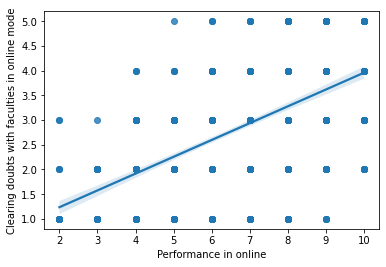

In [14]:
#Performance in online vs Clearing doubts with faculties in online mode 

sns.regplot(x= 'Performance in online', y= 'Clearing doubts with faculties in online mode', data = online_education)

###### The above graph shows that the performance is directly related or positively related to the clarification of the doubts on a timely basis.

In [15]:
#Comparing between Home location vs Engaged in group studies

online_education.pivot_table(values='Performance in online', index='Engaged in group studies?', columns='Home Location', aggfunc='mean')

Home Location,Rural,Urban
Engaged in group studies?,,
No,6.545455,6.510101
yes,7.000000,6.929329


###### From the above table, it is clearly shown by engaging the in the group studies there is an improvement in the performance when compared to the people who are not engaged.

In [16]:
#Comparing between Home location vs Gender

online_education.pivot_table(values='sno', index='Home Location', columns='Gender', aggfunc='count')

Gender,Female,Male
Home Location,,
Rural,127,227
Urban,292,387


###### from the above table it is clearly shows that the female in the rural areas are less participating when compared to the female students living in the urban areas. Overall the female students ratio is less when compared to that of the male student's ratio.

In [17]:
table1 = pd.pivot_table(online_education,index =['Home Location','Gender'])
table1

Age(Years)  \
Home Location Gender               
Rural         Female   20.031496   
              Male     19.647577   
Urban         Female   19.928082   
              Male     19.713178   

                      Clearing doubts with faculties in online mode  \
Home Location Gender                                                  
Rural         Female                                       3.251969   
              Male                                         2.828194   
Urban         Female                                       2.900685   
              Male                                         2.648579   

                      Family size  Internet facility in your locality  \
Home Location Gender                                                    
Rural         Female     4.574803                            3.259843   
              Male       4.515419                            3.140969   
Urban         Female     4.383562                            3.852740   
              Male       4.322997                            3.754522   

                      Number of Subjects  Performance in online  \
Home Location Gender                                              
Rural         Female            6.606299               7.181102   
              Male              7.414097               6.458150   
Urban         Female            6.592466               6.856164   
              Male              7.286822               6.555556   

                      Sleep time (Hours)  Study time (Hours)  \
Home Location Gender                                           
Rural         Female            6.834646            4.818898   
              Male              7.185022            4.321586   
Urban         Female            6.979452            4.421233   
              Male              6.821705            4.093023   

                      Time spent on social media (Hours)  \
Home Location Gender                                       
Rural         Female                            2.511811   
              Male                              2.414097   
Urban         Female                            2.904110   
              Male                              2.607235   

                      Your interaction in online mode         sno  
Home Location Gender                                               
Rural         Female                         3.338583  591.133858  
              Male                           2.867841  620.502203  
Urban         Female                         3.020548  476.989726  
              Male                           2.764858  462.149871

###### From the above table, it clearly shows that sleep time is more which is on average they are sleeping for 7 hours and it is sufficient. moreover, There is an average study time is more than 4 hours, and social media is half of the time spent on the studies.

<AxesSubplot:xlabel='Performance in online', ylabel='Your interaction in online mode'>

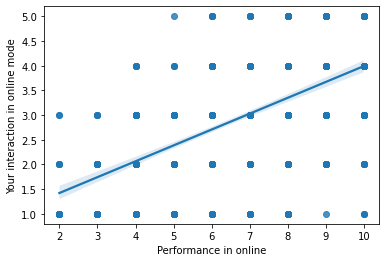

In [18]:
#Performance in online vs Your interaction in online mode

sns.regplot(x= 'Performance in online', y= 'Your interaction in online mode', data = online_education)

###### From the above graph, it is clearly stated that online interaction is directly proportional to performance.

<AxesSubplot:xlabel='Performance in online', ylabel='Internet facility in your locality'>

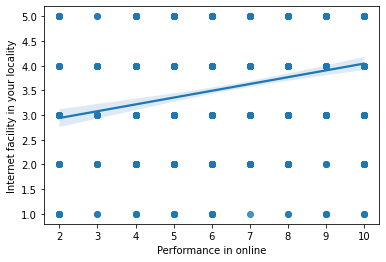

In [19]:
#Performance in online vs Internet facility in your locality

sns.regplot(x= 'Performance in online', y= 'Internet facility in your locality', data = online_education)

###### From the plot, we can say that performance in online education is gradually increasing with respect to internet facilities in your locality.

<AxesSubplot:xlabel='Performance in online', ylabel='Time spent on social media (Hours)'>

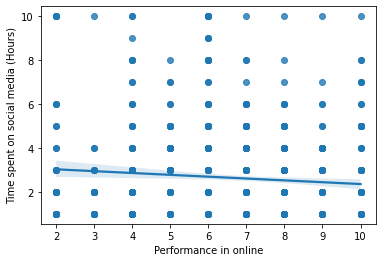

In [20]:
#Performance in online vs Time spent on social media (Hours)

sns.regplot(x= 'Performance in online', y= 'Time spent on social media (Hours)', data = online_education)

###### From the plot, we can say that performance in online education is slowly increasing when time spent on social media decreases.

In [21]:
#Home location vs Have separate room for studying

online_education.pivot_table(values='Performance in online', index='Have separate room for studying?', columns='Home Location', aggfunc='mean')

Home Location,Rural,Urban
Have separate room for studying?,,
No,6.630952,6.451362
Yes,6.795699,6.827014


###### Students in Urban area are having separate room for studying perform slightly better than rural area. Students in rural area not  having separate room for studying perform slightly better than urban area.

In [22]:
#Home location vs Device type used to attend classes

online_education.pivot_table(values='Performance in online', index='Device type used to attend classes', columns='Home Location', aggfunc='mean')

Home Location,Rural,Urban
Device type used to attend classes,,
Desktop,6.900000,6.941176
Laptop,6.543210,6.641176
Mobile,6.862637,6.802632


###### Students staying in rural and urban areas are performing better using desktop rather than laptop or mobile.

In [23]:
#Home location vs Economic status

online_education.pivot_table(values='Performance in online', index='Economic status', columns='Home Location', aggfunc='mean')

Home Location,Rural,Urban
Economic status,,
Middle Class,6.721519,6.680251
Poor,6.485714,6.071429
Rich,9.000000,7.111111


<AxesSubplot:xlabel='Performance in online', ylabel='Family size'>

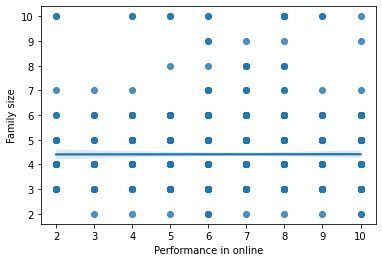

In [24]:
#Performance in online vs Family size

sns.regplot(x= 'Performance in online', y= 'Family size', data = online_education)

###### From the plot we can say that there performance in online education is not related to Family size. So we will not consider this variable for analysis.

In [25]:
#Level of Education vs Interested in?

online_education.pivot_table(values='sno', index='Level of Education', columns='Interested in?', aggfunc='count')

Interested in?,Both,Practical,Theory
Level of Education,,,
Post Graduate,33,68,28
School,29,36,22
Under Graduate,285,335,197


###### Undergraduate students are more interested in the practical, theory and both.

In [26]:
#Level of Education vs Your level of satisfaction in Online Education

online_education.pivot_table(values='sno', index='Level of Education', columns='Your level of satisfaction in Online Education', aggfunc='count')

Your level of satisfaction in Online Education,Average,Bad,Good
Level of Education,,,
Post Graduate,70,22,37
School,41,22,24
Under Graduate,430,197,190


###### More number of undergraduate students are averagly satisfied than school and post graduate students.

## Missing Values

In [27]:
#Taking a glance at the null values in the data

online_education.isnull()
online_education.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education,sno
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,No,No,No,91-100,1,1,Practical,6,Average,1
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,Yes,Yes,No,91-100,1,1,Theory,3,Bad,2
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,No,Yes,No,71-80,1,1,Both,6,Bad,3
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,No,No,yes,91-100,1,2,Theory,4,Bad,4
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,Yes,Yes,yes,81-90,3,3,Both,6,Average,5


###### No Missing values

In [28]:
#Converting to numerical variables

online_education["int_Gender"] = " "
for i in range(len(online_education['Gender'])):
    if online_education['Gender'][i] == 'Female':
        online_education.loc[i,'int_Gender'] = 0
        
    elif online_education['Gender'][i] == 'Male':
        online_education.loc[i,'int_Gender'] = 1

online_education["int_HomeLocation"] = " "
for i in range(len(online_education['Home Location'])):
    if online_education['Home Location'][i] == 'Rural':
        online_education.loc[i,'int_HomeLocation'] = 0
    elif online_education['Home Location'][i] == 'Urban':
        online_education.loc[i,'int_HomeLocation'] = 1

online_education["int_LevelofEducation"] = " "
for i in range(len(online_education['Level of Education'])):
    if online_education['Level of Education'][i] == 'School':
        online_education.loc[i,'int_LevelofEducation'] = 0
    elif online_education['Level of Education'][i] == 'Under Graduate':
        online_education.loc[i,'int_LevelofEducation'] = 1
    elif online_education['Level of Education'][i] == 'Post Graduate':
        online_education.loc[i,'int_LevelofEducation'] = 2

online_education['int_DeviceTypeUsedToAttendClassesLevelOEducation']= " "
for i in range(len(online_education['Level of Education'])):
    if online_education['Device type used to attend classes'][i] == 'Mobile':
        online_education.loc[i,'int_DeviceTypeUsedToAttendClassesLevelOEducation'] = 0
    elif online_education['Device type used to attend classes'][i] == 'Laptop':
        online_education.loc[i,'int_DeviceTypeUsedToAttendClassesLevelOEducation'] = 1
    elif online_education['Device type used to attend classes'][i] == 'Desktop':
        online_education.loc[i,'int_DeviceTypeUsedToAttendClassesLevelOEducation'] = 2

online_education['int_EconomicStatus']= " "
for i in range(len(online_education['Economic status'])):
    if online_education['Economic status'][i] == 'Poor':
        online_education.loc[i,'int_EconomicStatus'] = 0
    elif online_education['Economic status'][i] == 'Middle Class':
        online_education.loc[i,'int_EconomicStatus'] = 1
    elif online_education['Economic status'][i] == 'Rich':
        online_education.loc[i,'int_EconomicStatus'] = 2  

online_education['int_Sports']= " "
for i in range(len(online_education['Are you involved in any sports?'])):
    if online_education['Are you involved in any sports?'][i] == 'No':
        online_education.loc[i,'int_Sports'] = 0
    elif online_education['Are you involved in any sports?'][i] == 'Yes':
        online_education.loc[i,'int_Sports'] = 1

online_education['int_ElderlyMonitor']= " "
for i in range(len(online_education['Do elderly people monitor you?'])):
    if online_education['Do elderly people monitor you?'][i] == 'No':
        online_education.loc[i,'int_ElderlyMonitor'] = 0
    elif online_education['Do elderly people monitor you?'][i] == 'Yes':
        online_education.loc[i,'int_ElderlyMonitor'] = 1

online_education['int_Gaming']= " "
for i in range(len(online_education['Interested in Gaming?'])):
    if online_education['Interested in Gaming?'][i] == 'No':
        online_education.loc[i,'int_Gaming'] = 0
    elif online_education['Interested in Gaming?'][i] == 'Yes':
        online_education.loc[i,'int_Gaming'] = 1 

online_education['int_StudyRoom']= " "
for i in range(len(online_education['Have separate room for studying?'])):
    if online_education['Have separate room for studying?'][i] == 'No':
        online_education.loc[i,'int_StudyRoom'] = 0
    elif online_education['Have separate room for studying?'][i] == 'Yes':
        online_education.loc[i,'int_StudyRoom'] = 1 


online_education['int_GroupStudies']= " "
for i in range(len(online_education['Engaged in group studies?'])):
    if online_education['Engaged in group studies?'][i] == 'No':
        online_education.loc[i,'int_GroupStudies'] = 0
    elif online_education['Engaged in group studies?'][i] == 'Yes':
        online_education.loc[i,'int_GroupStudies'] = 1
    else:
       online_education.loc[i,'int_GroupStudies'] = 0

online_education['int_InterestedIn']= " "
for i in range(len(online_education['Interested in?'])):
    if online_education['Interested in?'][i] == 'Theory':
        online_education.loc[i,'int_InterestedIn'] = 0
    elif online_education['Interested in?'][i] == 'Practical':
        online_education.loc[i,'int_InterestedIn'] = 1 
    elif online_education['Interested in?'][i] == 'Both':
        online_education.loc[i,'int_InterestedIn'] = 2

online_education['int_SatisfactionInOnlineEducation']= " "
for i in range(len(online_education['Your level of satisfaction in Online Education'])):
    if online_education['Your level of satisfaction in Online Education'][i] == 'Bad':
        online_education.loc[i,'int_SatisfactionInOnlineEducation'] = 0
    elif online_education['Your level of satisfaction in Online Education'][i] == 'Average':
        online_education.loc[i,'int_SatisfactionInOnlineEducation'] = 1 
    elif online_education['Your level of satisfaction in Online Education'][i] == 'Good':
        online_education.loc[i,'int_SatisfactionInOnlineEducation'] = 2  

online_education['int_ClassroomMarks']= " "
for i in range(len(online_education['Average marks scored before pandemic in traditional classroom'])):
    if online_education['Average marks scored before pandemic in traditional classroom'][i] == '0-10':
        online_education.loc[i,'int_ClassroomMarks'] = 0
    elif online_education['Average marks scored before pandemic in traditional classroom'][i] == '11-20':
        online_education.loc[i,'int_ClassroomMarks'] = 1 
    elif online_education['Average marks scored before pandemic in traditional classroom'][i] == '21-30':
        online_education.loc[i,'int_ClassroomMarks'] = 2 
    elif online_education['Average marks scored before pandemic in traditional classroom'][i] == '31-40':
        online_education.loc[i,'int_ClassroomMarks'] = 3 
    elif online_education['Average marks scored before pandemic in traditional classroom'][i] == '41-50':
        online_education.loc[i,'int_ClassroomMarks'] = 4 
    elif online_education['Average marks scored before pandemic in traditional classroom'][i] == '51-60':
        online_education.loc[i,'int_ClassroomMarks'] = 5 
    elif online_education['Average marks scored before pandemic in traditional classroom'][i] == '61-70':
        online_education.loc[i,'int_ClassroomMarks'] = 6 
    elif online_education['Average marks scored before pandemic in traditional classroom'][i] == '71-80':
        online_education.loc[i,'int_ClassroomMarks'] = 7 
    elif online_education['Average marks scored before pandemic in traditional classroom'][i] == '81-90':
        online_education.loc[i,'int_ClassroomMarks'] = 8 
    elif online_education['Average marks scored before pandemic in traditional classroom'][i] == '91-100':
        online_education.loc[i,'int_ClassroomMarks'] = 9

In [29]:
online_education.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,int_DeviceTypeUsedToAttendClassesLevelOEducation,int_EconomicStatus,int_Sports,int_ElderlyMonitor,int_Gaming,int_StudyRoom,int_GroupStudies,int_InterestedIn,int_SatisfactionInOnlineEducation,int_ClassroomMarks
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,1,0,1,0,0,0,1,1,9
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,1,1,1,1,1,0,0,0,9
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,1,0,1,0,1,0,2,0,7
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,1,1,1,1,0,0,0,0,0,9
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,1,1,0,0,1,1,0,2,1,8


In [30]:
#Data after converting all variables to numerical

online_education_int = online_education.drop(columns=['Gender', 'Home Location', 'Level of Education', 'Device type used to attend classes', 'Economic status', 'Are you involved in any sports?', 'Do elderly people monitor you?', 'Interested in Gaming?', 'Have separate room for studying?', 'Engaged in group studies?', 'Average marks scored before pandemic in traditional classroom', 'Interested in?', 'Your level of satisfaction in Online Education'])
online_education_int

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online,...,int_DeviceTypeUsedToAttendClassesLevelOEducation,int_EconomicStatus,int_Sports,int_ElderlyMonitor,int_Gaming,int_StudyRoom,int_GroupStudies,int_InterestedIn,int_SatisfactionInOnlineEducation,int_ClassroomMarks
0,18,11,4,5,3,6,1,1,1,6,...,1,1,0,1,0,0,0,1,1,9
1,19,7,4,1,7,5,1,1,1,3,...,1,1,1,1,1,1,0,0,0,9
2,18,5,5,2,6,7,1,1,1,6,...,1,1,0,1,0,1,0,2,0,7
3,18,5,4,4,3,6,2,1,2,4,...,1,1,1,1,0,0,0,0,0,9
4,18,5,4,3,8,7,2,3,3,6,...,1,1,0,0,1,1,0,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,19,3,6,5,4,8,4,4,4,8,...,0,1,1,1,1,1,0,0,1,9
1029,20,6,3,1,3,7,2,5,5,10,...,2,1,0,0,1,1,0,0,1,7
1030,20,3,3,2,3,6,3,2,2,6,...,0,1,0,0,0,1,0,0,1,7
1031,19,6,2,3,4,6,2,3,3,6,...,0,1,1,0,1,0,0,2,2,6


In [31]:
#Datatype of raw dataset

online_education.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 37 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

In [32]:
#Converting all datatypes to int64

online_education_int['int_Gender']=online_education_int['int_Gender'].astype('int64')
online_education_int['int_HomeLocation']=online_education_int['int_HomeLocation'].astype('int64')
online_education_int['int_LevelofEducation']=online_education_int['int_LevelofEducation'].astype('int64')
online_education_int['int_DeviceTypeUsedToAttendClassesLevelOEducation']=online_education_int['int_DeviceTypeUsedToAttendClassesLevelOEducation'].astype('int64')
online_education_int['int_EconomicStatus']=online_education_int['int_EconomicStatus'].astype('int64')
online_education_int['int_Sports']=online_education_int['int_Sports'].astype('int64')
online_education_int['int_ElderlyMonitor']=online_education_int['int_ElderlyMonitor'].astype('int64')
online_education_int['int_Gaming']=online_education_int['int_Gaming'].astype('int64')
online_education_int['int_StudyRoom']=online_education_int['int_StudyRoom'].astype('int64')
online_education_int['int_GroupStudies']=online_education_int['int_GroupStudies'].astype('int64')
online_education_int['int_InterestedIn']=online_education_int['int_InterestedIn'].astype('int64')
online_education_int['int_SatisfactionInOnlineEducation']=online_education_int['int_SatisfactionInOnlineEducation'].astype('int64')
online_education_int['int_ClassroomMarks']=online_education_int['int_ClassroomMarks'].astype('int64')
online_education_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 24 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Age(Years)                                        1033 non-null   int64
 1   Number of Subjects                                1033 non-null   int64
 2   Family size                                       1033 non-null   int64
 3   Internet facility in your locality                1033 non-null   int64
 4   Study time (Hours)                                1033 non-null   int64
 5   Sleep time (Hours)                                1033 non-null   int64
 6   Time spent on social media (Hours)                1033 non-null   int64
 7   Your interaction in online mode                   1033 non-null   int64
 8   Clearing doubts with faculties in online mode     1033 non-null   int64
 9   Performance in online                    

<AxesSubplot:>

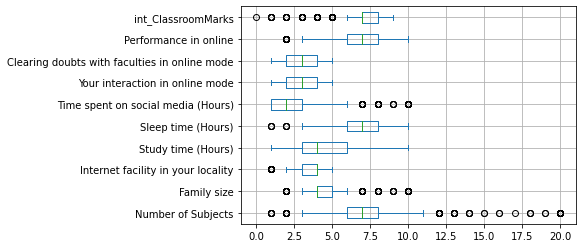

In [33]:
#Box plot for outliers

online_education_int[['Number of Subjects', 'Family size', 'Internet facility in your locality', 'Study time (Hours)', 'Sleep time (Hours)', 'Time spent on social media (Hours)', 'Your interaction in online mode', 'Clearing doubts with faculties in online mode', 'Performance in online','int_ClassroomMarks' ]].plot.box(grid='True',vert=False)

<AxesSubplot:>

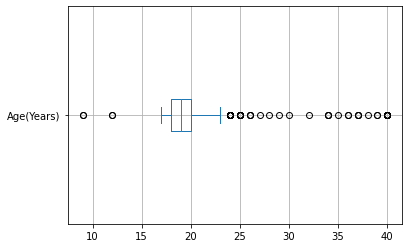

In [34]:
online_education_int[['Age(Years)']].plot.box(grid='True',vert=False)

In [35]:
#Removal of outliers using boxplot 
online_education_int = online_education_int[online_education_int['Family size']<8]
online_education_int = online_education_int[online_education_int['Family size']>2]
online_education_int = online_education_int[online_education_int['Time spent on social media (Hours)']<9]
online_education_int = online_education_int[online_education_int['Sleep time (Hours)']>3]
online_education_int = online_education_int[online_education_int['int_ClassroomMarks']>2] #  >30 marks
online_education_int = online_education_int[online_education_int['Age(Years)']>13]

<AxesSubplot:>

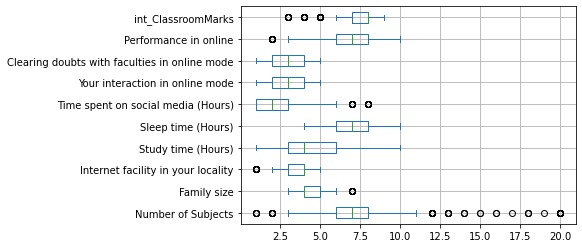

In [36]:
#Box plot after removing outliers 

online_education_int[['Number of Subjects', 'Family size', 'Internet facility in your locality', 'Study time (Hours)', 'Sleep time (Hours)', 'Time spent on social media (Hours)', 'Your interaction in online mode', 'Clearing doubts with faculties in online mode', 'Performance in online','int_ClassroomMarks' ]].plot.box(grid='True',vert=False)

<AxesSubplot:>

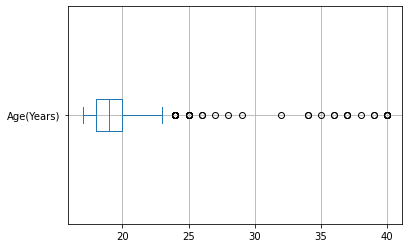

In [37]:
online_education_int[['Age(Years)']].plot.box(grid='True',vert=False)


<AxesSubplot:>

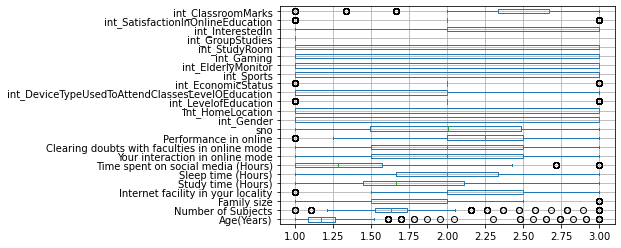

In [38]:
#Scaling the data

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(1, 3))
feature_names = online_education_int.columns
tfm = scaler.fit_transform(online_education_int)
scaled_online_education = pd.DataFrame(tfm, columns=feature_names)
scaled_online_education.plot.box(grid='True', vert=False)

In [39]:
feature_input = ['Age(Years)', 'Number of Subjects', 'Family size', 'Internet facility in your locality', 'Study time (Hours)', 'Sleep time (Hours)', 'Time spent on social media (Hours)', 'Your interaction in online mode', 'Clearing doubts with faculties in online mode', 'int_Gender', 'int_HomeLocation', 'int_LevelofEducation', 'int_DeviceTypeUsedToAttendClassesLevelOEducation', 'int_EconomicStatus', 'int_Sports', 'int_ElderlyMonitor', 'int_Gaming', 'int_StudyRoom', 'int_GroupStudies', 'int_InterestedIn', 'int_SatisfactionInOnlineEducation', 'int_ClassroomMarks']
feature_output = ['Performance in online']
oedf_int_ip = scaled_online_education[feature_input]
oedf_int_op = scaled_online_education[feature_output]

In [40]:
from sklearn.model_selection import train_test_split
trn_x, tst_x, trn_y, tst_y = train_test_split(oedf_int_ip,oedf_int_op,test_size = 0.20,random_state = 42) 

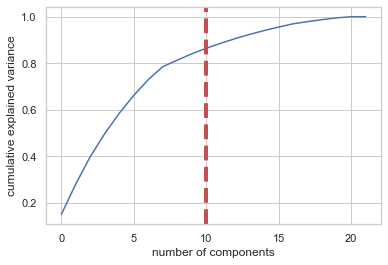

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.151351,0.151351
1,0.282195,0.130845
2,0.399584,0.117389
3,0.498625,0.099040
4,0.585487,0.086862
5,0.662405,0.076918
6,0.729885,0.067480
7,0.785594,0.055709
8,0.813400,0.027806
9,0.840607,0.027208


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=22)
pca_test.fit(trn_x)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [42]:
pca = PCA(n_components=10)
pca.fit(trn_x)
X_train_scaled_pca = pca.transform(trn_x)
X_test_scaled_pca = pca.transform(tst_x)

In [43]:
pca_dims = []
column_headers = list(oedf_int_ip.columns)
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=column_headers, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
Age(Years),0.008583,-7.576051e-03,1.089678e-02,3.168357e-02,-0.021277,0.017031,-0.039503,0.065640,-0.039913,-0.038295
Number of Subjects,-0.022630,1.655107e-02,-4.771761e-03,9.913540e-03,0.020036,-0.039109,-0.019415,-0.003463,-0.005296,-0.063557
Family size,0.028494,3.661298e-02,6.246559e-02,-2.527070e-02,0.061398,0.003913,0.046043,0.039865,-0.028961,0.026338
Internet facility in your locality,-0.000724,-2.274358e-01,-1.290754e-02,5.452750e-02,-0.096851,0.057437,-0.137490,0.019540,0.622410,-0.138025
Study time (Hours),0.055470,-3.682295e-02,7.858492e-02,4.110037e-02,0.005534,-0.058775,-0.047748,0.061044,-0.232505,-0.507318
Sleep time (Hours),-0.011010,-2.653528e-03,7.278154e-03,7.473823e-02,-0.004262,0.032946,0.014994,-0.005715,0.082104,0.171960
Time spent on social media (Hours),-0.004910,-2.484390e-02,-3.025051e-02,1.088336e-02,-0.061320,0.009043,0.069810,-0.018145,0.283928,0.226419
Your interaction in online mode,0.084238,-1.018073e-01,2.628174e-01,2.034686e-01,-0.127627,0.151805,-0.288897,0.064486,-0.065465,-0.260973
Clearing doubts with faculties in online mode,0.110039,-9.587824e-02,2.827663e-01,2.050564e-01,-0.104082,0.116314,-0.344662,0.053623,-0.113700,-0.238537
int_Gender,-0.603998,2.167464e-01,-9.997216e-02,5.506266e-02,0.312922,-0.293819,-0.554373,-0.268304,-0.005074,-0.006668


In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca,  trn_y.astype('int'))

result_rf = rfc.predict(X_train_scaled_pca.astype('int'))


result_rf


C:\Users\Arjun\AppData\Local\Temp\ipykernel_14324\1365439534.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_scaled_pca,  trn_y.astype('int'))


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [45]:
from sklearn.model_selection import GridSearchCV
n_estimators = [300,500,700]
max_features = ['sqrt']
max_depth = [2,3,7,11,15]
min_samples_split = [2,3,4,22,23,24]
min_samples_leaf = [2,3,4,5,6,7]
bootstrap = [False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled_pca, trn_y.astype('int'))
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': False,
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 24,
 'n_estimators': 500}

In [46]:

rf_cl = RandomForestClassifier(max_depth=3, random_state=0,max_features = 22)
rf_cl.fit(trn_x.astype('int'), trn_y.astype('int'))
y_pred = rf_cl.predict(tst_x.astype('int'))

y_pred_pca = rfc.predict(X_test_scaled_pca)
y_pred_gs = gs.best_estimator_.predict(X_test_scaled_pca)

C:\Users\Arjun\AppData\Local\Temp\ipykernel_14324\3462100992.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cl.fit(trn_x.astype('int'), trn_y.astype('int'))


'Baseline Random Forest recall score'

0.7684210526315789

'conf_matrix_baseline_pca'

0.6947368421052632

'Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score'

0.7210526315789474

'Baseline Random Forest f1 score'

0.7684210526315788

'conf_matrix_baseline_pca'

0.6947368421052632

'Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality F1 score'

0.7210526315789474

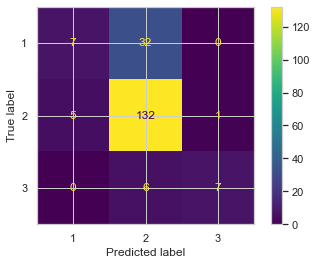

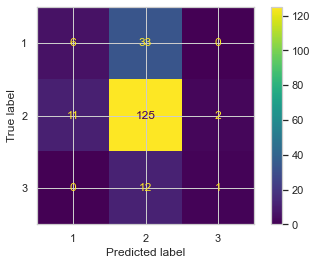

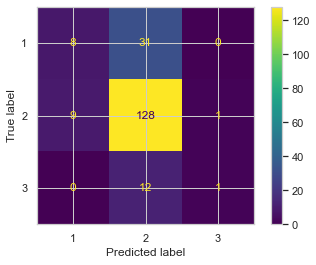

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


cm = confusion_matrix(tst_y.astype('int'), y_pred.astype('int'))
cm_pca = confusion_matrix(tst_y.astype('int'), y_pred_pca.astype('int'))
cm_gs = confusion_matrix(tst_y.astype('int'), y_pred_gs.astype('int'))

#conf_matrix_baseline = pd.DataFrame(confusion_matrix(tst_y.astype('int'), y_pred.astype('int')), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
#conf_matrix_baseline_pca = pd.DataFrame(confusion_matrix(tst_y.astype('int'), y_pred_pca.astype('int')), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
#conf_matrix_tuned_pca = pd.DataFrame(confusion_matrix(tst_y.astype('int'), y_pred_gs.astype('int')), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

disp.plot()
disp_pca.plot()
disp_gs.plot()
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)

display('Baseline Random Forest recall score', recall_score(tst_y.astype('int'), y_pred.astype('int'), average='micro'))

disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca,display_labels=rfc.classes_)

display('conf_matrix_baseline_pca', recall_score(tst_y.astype('int'), y_pred_pca.astype('int'), average='micro'))
disp_gs = ConfusionMatrixDisplay(confusion_matrix=cm_gs,display_labels=rfc.classes_)
display('Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score', recall_score(tst_y.astype('int'), y_pred_gs.astype('int'), average='micro'))

display('Baseline Random Forest f1 score', f1_score(tst_y.astype('int'), y_pred.astype('int'), average='micro'))

disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca,display_labels=rfc.classes_)

display('conf_matrix_baseline_pca', f1_score(tst_y.astype('int'), y_pred_pca.astype('int'), average='micro'))
disp_gs = ConfusionMatrixDisplay(confusion_matrix=cm_gs,display_labels=rfc.classes_)
display('Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality F1 score', f1_score(tst_y.astype('int'), y_pred_gs.astype('int'), average='micro'))


#display(conf_matrix_baseline)



#display(conf_matrix_baseline_pca)
#display('Baseline Random Forest With PCA recall score', recall_score(tst_y, y_pred_pca))
#display(conf_matrix_tuned_pca)
#display('Hyperparameter Tuned Random Forest With PCA Reduced Dimensionality recall score', recall_score(tst_y, y_pred_gs))

## kNN: KNeighborsClassifier

In [64]:
pca = PCA(n_components=10)
pca.fit(trn_x)
X_train_scaled_pca = pca.transform(trn_x)
X_test_scaled_pca = pca.transform(trn_x)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn_cl = KNeighborsClassifier(n_neighbors=3)
knn_cl.fit(trn_x.astype('int'), trn_y.astype('int'))
result_knn = knn_cl.predict(tst_x.astype('int'))
result_knn_proba = knn_cl.predict_proba(tst_x.astype('int'))
result_knn


C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2])

In [66]:
import math as mth
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

meanSqEr_knn = mean_squared_error(tst_y, result_knn)
rmsEr_knn = mth.sqrt(meanSqEr_knn)
absEr_knn = mean_absolute_error(tst_y, result_knn)
acScr_knn = accuracy_score(tst_y.astype('int'), result_knn.astype('int'))

print("Root Mean Sq Err RMSE: ", rmsEr_knn)
print("Abs Err: ", absEr_knn)
print("Accuracy Score: ", acScr_knn)

Root Mean Sq Err RMSE:  0.5721036895344649
Abs Err:  0.41710526315789476
Accuracy Score:  0.7


## LR:  LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression
lr_cl = LogisticRegression(random_state=3)
lr_cl.fit(trn_x.astype('int'), trn_y.astype('int'))
result_lr = lr_cl.predict(tst_x.astype('int'))
result_lr_proba = lr_cl.predict_proba(tst_x.astype('int'))
result_lr

C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
meanSqEr_lr = mean_squared_error(tst_y, result_lr)
rmsEr_lr = mth.sqrt(meanSqEr_lr)
absEr_lr = mean_absolute_error(tst_y, result_lr)
acScr_lr = accuracy_score(tst_y.astype('int'), result_lr.astype('int'))

print("Root Mean Sq Err RMSE: ", rmsEr_lr)
print("Abs Err: ", absEr_lr)
print("Accuracy Score: ", acScr_lr)

Root Mean Sq Err RMSE:  0.45414755311462374
Abs Err:  0.34342105263157896
Accuracy Score:  0.7736842105263158


## RF: RandomForestClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(max_depth=3, random_state=0,max_features = 22)
rf_cl.fit(trn_x.astype('int'), trn_y.astype('int'))
result_rf = rf_cl.predict(tst_x.astype('int'))
result_rf_proba = rf_cl.predict_proba(tst_x.astype('int'))
result_rf


C:\Users\Arjun\AppData\Local\Temp\ipykernel_14324\1093925719.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cl.fit(trn_x.astype('int'), trn_y.astype('int'))


array([2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
meanSqEr_rf = mean_squared_error(tst_y, result_rf)
rmsEr_rf = mth.sqrt(meanSqEr_rf)
absEr_rf = mean_absolute_error(tst_y, result_rf)
acScr_rf = accuracy_score(tst_y.astype('int'), result_rf.astype('int'))
print("Root Mean Sq Err RMSE: ", rmsEr_rf)
print("Abs Err: ", absEr_rf)
print("Accuracy Score: ", acScr_rf)

Root Mean Sq Err RMSE:  0.4512409789155143
Abs Err:  0.3355263157894737
Accuracy Score:  0.7684210526315789


## SVM: Support Vector Machines

In [71]:
from sklearn.svm import SVC

svm_cl = SVC(gamma ='auto', probability = True)
svm_cl.fit(trn_x.astype('int'), trn_y.astype('int'))
result_svm = svm_cl.predict(tst_x.astype('int'))


result_svm




C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2])

In [72]:
meanSqEr_svm = mean_squared_error(tst_y, result_svm)
rmsEr_svm = mth.sqrt(meanSqEr_svm)
absEr_svm = mean_absolute_error(tst_y, result_svm)
acScr_svm = accuracy_score(tst_y.astype('int'), result_svm.astype('int'))

print("Root Mean Sq Err RMSE: ", rmsEr_svm)
print("Abs Err: ", absEr_svm)
print("Accuracy Score: ", acScr_svm)

Root Mean Sq Err RMSE:  0.5088040673455435
Abs Err:  0.3828947368421053
Accuracy Score:  0.7210526315789474


## Results

In [73]:
acScr_lr = accuracy_score(tst_y.astype('int'), result_lr.astype('int'))
acScr_knn = accuracy_score(tst_y.astype('int'), result_knn.astype('int'))
acScr_rf = accuracy_score(tst_y.astype('int'), result_rf.astype('int'))
acScr_svm = accuracy_score(tst_y.astype('int'), result_svm.astype('int'))


print("Logistic Regression Accuracy: ", acScr_lr)
print("kNN Accuracy: ", acScr_knn)
print("Random Forest Accuracy: ", acScr_rf)
print("SVM Accuracy: ", acScr_svm)

Logistic Regression Accuracy:  0.7736842105263158
kNN Accuracy:  0.7
Random Forest Accuracy:  0.7684210526315789
SVM Accuracy:  0.7210526315789474
